<h2> ======================================================</h2>
 <h1>MA477 - Theory and Applications of Data Science</h1> 
  <h1>Lesson 11: Logistic Regression </h1> 
 
 <h4>Dr. Valmir Bucaj</h4>
 United States Military Academy, West Point 
AY20-2
<h2>======================================================</h2>

<h2>Lecture Outline</h2>

<ul>
    <li>Why not Linear Regression?</li>
    <li> What is Logistic Regression?</li>
    <li>Estimating Regression Coefficients</li>
    <li> Logistic Regression with more than 2 response classes</li>
    <li> Python Implementation</li>
    
</ul>


<h2> Why not Linear Regression?</h2>

We will illustrate below that in the cases when the response variable is a qualitative variable, then linear regression may not be appropriate. So, why is that? 

Let's illustrate this using the `iris` dataset. In the iris dataset one is tasked to determine whether a plant is of type `setosa, versicolor` or `virginica` based on `sepal length, width` and `petal length, width`. 

So, the response variable $Y$ is clearly qualitative. Now, before we can fit a Linear Regression model (or most models for that matter) we need to first encode the outcomes using numbers. So, this is exactly where the dilemma lies. In other words, how do we encode a qualitative response variable with more than two possibilities? We will demonstrate shortly, that the model we obtain is highly sensitive to how you encode the qualitative variable. That is, if two different teams encoded the qualitative variables with more than two outcomes differently, they could end up with very different models which in turn would produce very different predictions on the new, previously unseen by the model, data. Obviously, this is a very undesirable outcome. 

For the purpose of this demonstration we will use the following two encodings for the response variable:

<b> Case 1</b>

$$Y_1=\begin{cases}
0 & \text{ setosa }\\
1 & \text{ versicolor }\\
2 & \text{ virginica }
\end{cases}
$$

<b> Case 2 </b>

$$Y_2=\begin{cases}
2 & \text{ setosa }\\
0 & \text{ versicolor }\\
1 & \text{ virginica }
\end{cases}
$$

We'll import our standard libraries as well as the `iris` dataset wich may be found in `sklearn.datasets`.


In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_iris

In [4]:
iris=load_iris()

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [8]:
df1=pd.DataFrame(iris.data,columns=iris.feature_names)

In [9]:
df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
df1['target']=iris.target

In [11]:
df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0




Recall that the current encodings of the response variable are as follows: 

$$Y_1=\begin{cases}
0 & \text{ setosa }\\
1 & \text{ versicolor }\\
2 & \text{ virginica }
\end{cases}
$$

In what follows, we will create a second dataframe `df2` with the response variable encoded as 

$$Y_1=\begin{cases}
2 & \text{ setosa }\\
0 & \text{ versicolor }\\
1 & \text{ virginica }
\end{cases}
$$

In [12]:
df2=df1.copy()
df2['target']=df2['target'].apply(lambda x: 2 if x==0 else 0 if x==1 else 1)

In [13]:
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2


Next, we will fit two Linear Regression models, and compare the coefficients of the model. 

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [15]:
lg1=LinearRegression()
lg2=LinearRegression()

In [16]:
X1=df1.drop("target",axis=1)
y1=df1['target']

X2=df2.drop("target",axis=1)
y2=df2['target']

In [17]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.1,random_state=1)

X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=0.1,random_state=1)

In [18]:
X1_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
42,4.4,3.2,1.3,0.2
92,5.8,2.6,4.0,1.2
66,5.6,3.0,4.5,1.5
31,5.4,3.4,1.5,0.4
35,5.0,3.2,1.2,0.2


In [19]:
X2_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
42,4.4,3.2,1.3,0.2
92,5.8,2.6,4.0,1.2
66,5.6,3.0,4.5,1.5
31,5.4,3.4,1.5,0.4
35,5.0,3.2,1.2,0.2


One thing to note is that since we used the same random state for both splits, `X1_train` and `X2_train` are identical, as it is desired. The only thing that differs is `y's`, since we used different encodings. 

Now, we fit two linear models using these two datasets.

In [20]:
lg1.fit(X1_train,y1_train)

lg2.fit(X2_train,y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Now, let's get the coefficients and compare them. 

In [21]:
coef1=lg1.coef_
coef2=lg2.coef_

In [22]:
df_coef=pd.DataFrame()
df_coef['coef1']=coef1
df_coef['coef2']=coef2

In [23]:
df_coef

,coef1,coef2
0,-0.143109,0.127436
1,-0.021897,0.661620
2,0.260573,-0.493013
3,0.570560,0.503313


Clearly, these coefficients are very different, and it is to be expected that they would produce different outcomes for the same input data. Let's test this. 

In [24]:
pred1=lg1.predict(X1_test)

pred2=lg2.predict(X2_test)

Next, let's put everything in a dataframe. Namely, the predictions of the two models, along with the actual classes of the plants.

In [25]:
df_pred=pd.DataFrame(index=y1_test.index)

df_pred['pred1']=pred1
df_pred['pred2']=pred2
df_pred['actual1']=y1_test
df_pred['actual2']=y2_test

In [26]:
df_pred

,pred1,pred2,actual1,actual2
14,-0.245633,2.408546,0,2
98,0.869925,0.892469,1,0
75,1.180283,0.875208,1,0
16,-0.046030,2.342771,0,2
131,1.840205,0.886133,2,1
56,1.408931,0.988222,1,0
141,1.831066,1.087474,2,1
44,0.155436,1.942570,0,2
29,0.033535,1.541865,0,2
120,1.985220,0.857828,2,1


In [27]:
df_pred['class name1']=df_pred['actual1'].apply(lambda x: 'setosa' if x==0 else 'versicolor' if x==1 else 'virginca')

In [28]:
df_pred['class name2']=df_pred['actual2'].apply(lambda x: 'setosa' if x==2 else 'versicolor' if x==0 else 'virginca')

In [29]:
df_pred

,pred1,pred2,actual1,actual2,class name1,class name2
14,-0.245633,2.408546,0,2,setosa,setosa
98,0.869925,0.892469,1,0,versicolor,versicolor
75,1.180283,0.875208,1,0,versicolor,versicolor
16,-0.046030,2.342771,0,2,setosa,setosa
131,1.840205,0.886133,2,1,virginca,virginca
56,1.408931,0.988222,1,0,versicolor,versicolor
141,1.831066,1.087474,2,1,virginca,virginca
44,0.155436,1.942570,0,2,setosa,setosa
29,0.033535,1.541865,0,2,setosa,setosa
120,1.985220,0.857828,2,1,virginca,virginca


As we can see, the two models could yield very different predictions. In fact, in this case, they don't match on a single output.

The other issue with this approach is the fact that the outcome of the linear regression cannot quite be interpreted as a probability since they may take values above one and below zero. 

<h2> Logistic Regression Model</h2>

For the remainder of this lesson, we will focus on the case of <b> binary</b> response variables. We will use the wisconsin breast cancer data set we previously used when we discussed KNN Classifier. 

Before we begin discussing the innerworkings of Logistic Regression, let's import the dataset.

In [30]:
from sklearn.datasets import load_breast_cancer

In [31]:
cancer=load_breast_cancer()

In [32]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [33]:
df=pd.DataFrame(cancer.data,columns=cancer.feature_names)

In [34]:
df['target']=cancer.target

In [35]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Recall that the target variable is a qualitative variable with two categories: <b> Malignant</b> and <b> Benign</b>. 

We will use the following encoding for the response variable:

$Y=\begin{cases} 0 & \text{ Malignant }\\
1 & \text{ Benign }
\end{cases}
$

<h3> How does Logistic Regression Work?</h3>

So, the response variable $Y$ can either be $0$ (Malignant) or $1$ (Benign). Instead of modeling directly the response variable $Y$, logistic regression, models instead the <b> probability </b> taht $Y$ belongs to a particular category. 

Specifically, if we denote by $X=(X_1,\dots, X_{30})$ all the $30$ cancer measurements, then logistic regression will instead model the probability that $Y=0$ or ($Y=$ Malignant) given the measurements $X$; that is 

$$p(X):= P\left(Y=0|X\right)$$

The values of $p(X)$ will be between $0$ and $1$. So, for example, we may predict <b> Malignant</b> if $p(X)>0.5$, or if we don't want to take a risk in misclassifying a malignant cell as benign, we can be more conservative and predict Malignant if $p(X)>0.1$ and predict <b> Benign</b> only if $p(X)\leq 0.1$. This is something that you as a Data Scientist have to decide depending on the goal at hand. 

Our goal is to find a good way to model the conditional probability $p(X)$.

<h3> Modeling $p(X)$</h3>

How can we model $p(X)?$.

We could try modeling these probabilities via linear regression $$p(X)=\beta_0+\sum_{i=1}^{30}\beta_iX_i$$

<b> Discussion:</b> Is this a good approach? Explain!

What is one of the main conditions that $p(X)$ must satisfy?

Well, since $p(X)$ represent probabilities their values must be between $0$ and $1$. So, we must hunt for functions whose output satisfies this condition. 

While there many functions that satisfy this condition, in the case of Logistic Regression we use the <b> logistic function </b> (in Neural Networks this function is typically referred to as the <b> Sigmoid</b> function):

$$S(z)=\frac{1}{1+e^{-z}}=\frac{e^z}{e^z+1}$$

<font size=5 color='red'> Exercise</font>

Plot $S(z)$ in the range $(-10,10)$

In [36]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

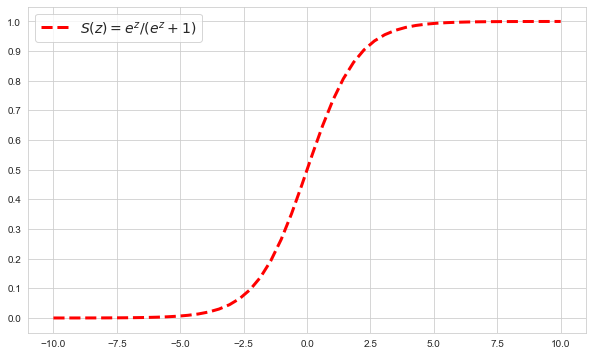

In [37]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))

z=np.linspace(-10,10,50)

plt.yticks(np.arange(0,1.01,0.1))

plt.plot(z,sigmoid(z), 'r--', lw=3, label='$S(z)=e^z / (e^z+1)$')
plt.legend(fontsize=14)
plt.show()

So, we would model $p(X)$ as follows:

$$p(X)=P(Y=Malignant|X)=\frac{e^{\beta_0+\sum_{i=1}^{30}\beta_iX_i}}{1+e^{\beta_0+\sum_{i=1}^{30}\beta_iX_i}}$$

<h3> Estimating the coefficients</h3>

The goal now is to estimate the regression coefficients $\beta_0,\dots,\beta_n$. We will do so via a method known as the <b> maximum likelihood</b> method. The maximum likelihood method is very general and is typically used to fit many of the non-linear models. 

The basic intuition behind the maximum likelihood method is as follows: Let $X^{(i)}$ denote the $30$ measurements for the $i^{th}$ breast cancer tissue. Then, we seek to find coefficients $\hat{\beta_0},\hat{\beta_1},\dots,\hat{\beta}_{30}$ such that $p\left(X^{(i)}\right)$ is very close to $1$ if the breast tissue is Malignant ($Y^{(i)}=0$) and it is very close to $0$ if the breast tissue is Benign ($Y^{(i)}=1)$.

Formally, the function that has this property is known as the <b> likelihood function </b>:

$$L(\beta_0,\beta_1,\dots,\beta_{30})=\prod_{i: Y^{(i)}=0}p\left(X^{(i)}\right)\prod_{j:Y^{(j)}=1}\left(1-p\left(X^{(j)}\right)\right)$$

The estimates $\hat{\beta_0},\hat{\beta_1},\dots,\hat{\beta}_{30}$ are chosen to maximize $L(\cdot)$

<h3> Extensions of Logistic Regression to Multiple-class Response Variables</h3>

There are ways to use Logisitc Regression to perform classification in the setting wehre the response variable can belong to three or more categories. We briefly mention here two such methods:

<ul>
    <li><b> One-Versus-One</b></li>
    
 Suppose that the response variable can belong to one of the $K\geq 3$ classes. In the one-versus-one approach, we construct $\frac{K(K-1)}{2}$ Logistic Regression models, each of which compares a pair of classes. The simplest way to classify a new, previously unseen by the model, observation is via a hard majority vote. Specifically, we use each of the $\frac{K(K-1)}{2}$ models to classify the new observation and tally the number of times that the new observation is assigned to each of the $K$ classes. At the end, the new observation is assigned to the class to which it was most frequently assigned overall. 
 
<br>
  <li><b> One-Versus-All</b></li>
  
  One-versus-all is a similar approach. In this case we fit a total of $K$ models, each time comparing one of the $K$ classes to the remaining $K-1$ classes.
    
 </ul>

There are other methods that accomodate multiple-class responses, one of the most popular one is Linear Discriminant Analysis (LDA).


<h2>Python Implementation</h2>

For this portion we will use the wisconsin breast cancer dataset.

In [38]:
from sklearn.linear_model import LogisticRegression

Logistic Regression has many parameters. The two most important ones that we will experiment with are `penalty` and `C`. Similar to the Lasso and Ridge methods, we can apply a regularization to the regression coefficients, namely, we can apply an $\ell^1$ or $\ell^2$ regularization, or an `elastic` regularization, which is a weighted average of the two. The constant $C$ is the inverse of the strength of the regularization. In other words, the smaller the value of $C$ the stronger the regularization.

In [39]:
lr=LogisticRegression(solver='liblinear')

For now, we will chose the validation-set method to asses the prediction power of the model. 

In [40]:
X=df.drop('target',axis=1)
y=df['target']

In [41]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler=StandardScaler()

In [44]:
scaled=scaler.fit_transform(X)

In [45]:
X_sc=pd.DataFrame(scaled, columns=X.columns)

In [46]:
X_sc.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


Next we split the data into a training and a test set and then we fit the model.

In [47]:
X_train,X_test,y_train,y_test=train_test_split(X_sc,y,test_size=0.3,random_state=11)

In [48]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Now the model is fit! What does this mean? It means that the coefficients $\beta_0,\dots,\beta_{30}$ have been estimated. We get them below:

In [49]:
df_coef=pd.DataFrame(lr.coef_,columns=X_sc.columns,index=['Coefficients'])

In [50]:
df_coef

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
Coefficients,-0.538909,-0.763845,-0.535134,-0.602959,0.102314,0.279111,-0.761106,-0.849325,-0.443181,0.575332,...,-0.945123,-1.450104,-0.864489,-0.910208,-0.626264,-0.136848,-0.607427,-0.806821,-0.738115,-0.654338


<font size=5 color='red'>Exercise</font>

Carry out the following tasks:

<b>Part 1</b>

-Make predictions

-Display the confusion matrix and classification report

-Plot the ROC curve and compute the AUC

<b>Part 2</b>

Tune the model to get the highest AUC and the best recall for Malignant class (class 0)

In [51]:
pred=lr.predict(X_test)

In [52]:
df_pred=pd.DataFrame(index=y_test.index)

df_pred['pred']=pred

In [53]:
df_pred

,pred
198,0
162,0
70,0
393,0
56,0
...,...
297,1
195,1
21,1
14,0


In [54]:
from sklearn.metrics import confusion_matrix, classification_report

In [55]:
print(confusion_matrix(y_test,pred))

[[ 57   4]
 [  3 107]]


In [56]:
print(classification_report(y_test,pred, target_names=['Malignant','Benign']))

              precision    recall  f1-score   support

   Malignant       0.95      0.93      0.94        61
      Benign       0.96      0.97      0.97       110

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [57]:
from sklearn.metrics import auc, roc_curve

In [58]:
lr_prob=LogisticRegression(solver='liblinear')

In [59]:
lr_prob.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
pred_prob=lr_prob.predict_proba(X_test)

In [62]:
tp,fp,_=roc_curve(y_test,pred_prob[:,0])

roc_auc=auc(fp,tp)

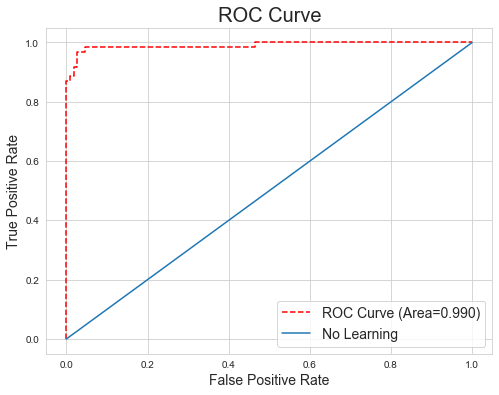

In [63]:
plt.figure(figsize=(8,6))
plt.plot(fp,tp,'r--',label='ROC Curve (Area={:.3f})'.format(roc_auc))
plt.plot([0,1],[0,1],label='No Learning')

plt.xlabel("False Positive Rate",fontsize=14)
plt.ylabel("True Positive Rate",fontsize=14)
plt.title("ROC Curve",fontsize=20)

plt.legend(fontsize=14)
plt.show()

In [65]:
auc_res=[]
mal_recall=[]

for i in range(1,40):
    lr=LogisticRegression(solver='liblinear')
    lr.fit(X_train,y_train)
    pred_prob=lr.predict_proba(X_test)
    pred=lr.predict(X_test)

    tp,fp,_=roc_curve(y_test,pred_prob[:,0])

    auc_res.append(auc(fp,tp))
    
    mal_recall.append(recall_score(y_test,pred,pos_label=0))

ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got 1.